Food Desert      No  Yes
County                  
Bronx           337    2
Napa             33    7
San Bernardino  219  150
San Francisco   193    3


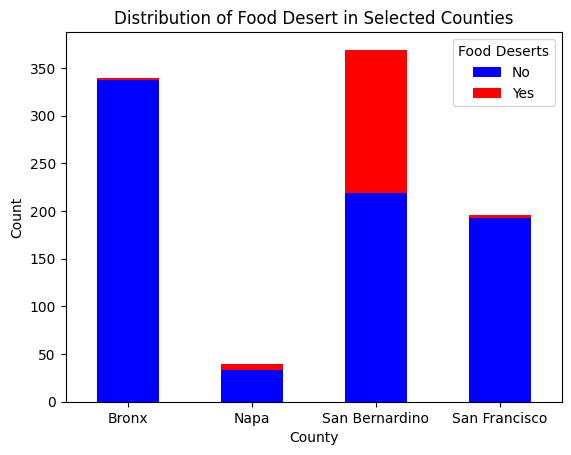

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
url = 'https://raw.githubusercontent.com/slromero/Project1/main/food_access_research_atlas%203.csv'
df = pd.read_csv(url)

# Filter data for specified counties
selected_counties = ['Napa', 'San Francisco', 'Bronx', 'San Bernardino']
selected_df = df[df['County'].isin(selected_counties)]


# Rename column 'LA1and10' to 'Food Desert'
selected_df = selected_df.rename(columns={'LA1and10': 'Food Desert'})

# Map values for 'Food Desert' to colors
colors = {0: 'blue', 1: 'red'}
selected_df['Food Desert'] = selected_df['Food Desert'].map(colors)

# Create a vertically stacked bar chart
fig, ax = plt.subplots()
selected_df.groupby(['County', 'Food Desert']).size().unstack().plot(kind='bar', stacked=True, ax=ax, color=['blue', 'red'])

# Set labels and title
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Distribution of Food Desert in Selected Counties')

# Customize legend labels
legend_labels = ['No', 'Yes']
ax.legend(legend_labels, title='Food Deserts')

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)

# Print numeric values
numeric_values = selected_df.groupby(['County', 'Food Desert']).size().unstack()
numeric_values = numeric_values.rename(columns={'blue': 'No', 'red': 'Yes'})
print(numeric_values)

# Show the plot
plt.show()

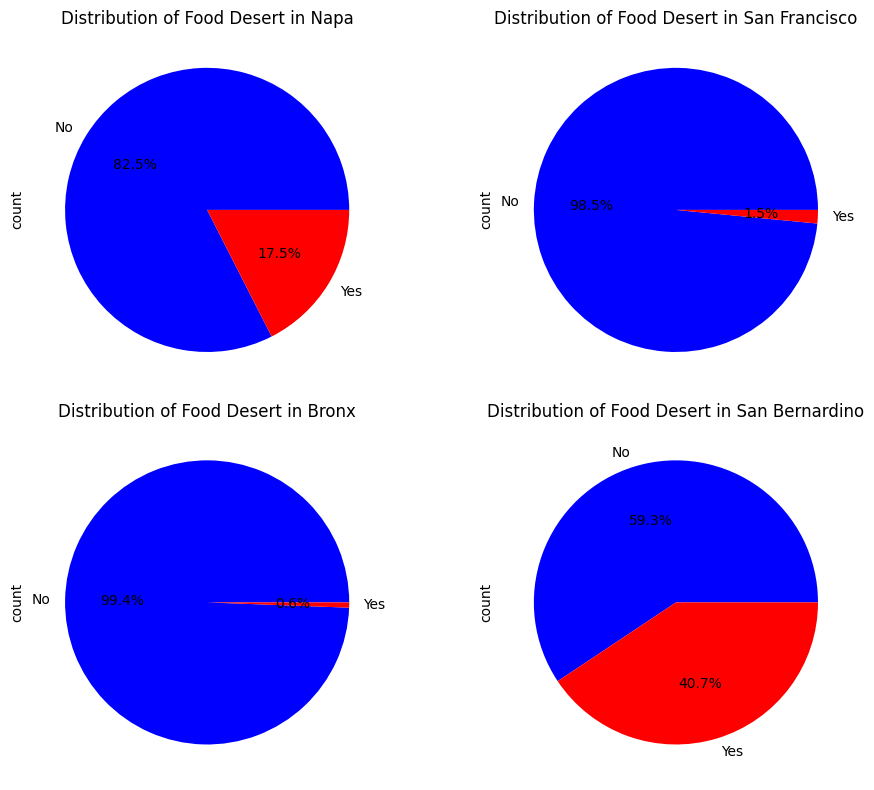

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Loop through each county and create a pie chart
for i, county in enumerate(selected_counties):
    ax = axes[i // 2, i % 2]

    # Filter data for the specific county
    selected_df = df[df['County'] == county]

    # Rename column 'LA1and10' to 'Food Desert'
    selected_df = selected_df.rename(columns={'LA1and10': 'Food Desert'})

    # Map values for 'Food Desert' to colors
    colors = {0: 'No', 1: 'Yes'}
    selected_df['Food Desert'] = selected_df['Food Desert'].map(colors)

    # Create a pie chart
    selected_df['Food Desert'].value_counts().plot.pie(ax=ax, autopct='%1.1f%%', colors=['blue', 'red'])

    # Set title for each pie chart
    ax.set_title(f'Distribution of Food Desert in {county}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
